Capstone Project
IBDM Dataset

This capstone is divided into a 4-phase duration. In this document, the entire details of the 4-phase(weekly) duration are given.



### Phase 1

    1) Webscrape the provided URL  - IMDB dataset:

    https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1

    2) Store the entire data in two different CSV files as per the given fields:

    The first CSV file data contains :

    Sno, Movie Name, Director Name, Duration, year, ratings, Metascore

    Bifurcate the Director field into subfields as per the number of directors of the movie belongs to such as Director1, director2

    The second CSV file contains the following:

    Movie Name, stars, votes, Genre, Gross collection, popularity, Certification

    Bifurcate the stars field into 4 subfields as per the number of stars worked in the movie such as star1, star2, star3, star4

    Bifurcate the genre into 3 subfields as per the number of genres the movie belongs to such as :

    Genre1, genre2, genre3

### Phase 2

    Make two tables and corresponding columns provided in the above CSV files in SQLite DBMS. Insert all data of each CSV file in each of the created tables. Now start querying the table(s) in the  SQL workbench / SQLite database :

    Table 1: Sno, MovieName, Director Name, Duration, genre, ratings

    1)  Display all the details of movies created by directors Christopher and Matt Reeves.

    2) Display all the details of movies with a duration of 140 minutes to 190 minutes.

    3) Display all details of movies with ratings above 7 in ascending order.

    4) Display all movie names in descending order.

    5) Display movie name starts with ‘P’ and their rating is greater than 7.



    Table 2: Movie Name, stars, votes, Genre, Gross collection, popularity, Certification

    1) Display all movie names with star Arnold Schwarzenegger in ascending order.

    2    2) Display all details of the movie with the highest number of votes.

    3) Display movie names with gross collections in descending order.

    4) Display the gross collection of movies with the star Arnold.

    5) Display all details of movies with comedy and action genres.



    Make subquery :

    1) Display all details from both tables where movie names are the same.

    2)   Display all movie names, Director, ratings, and gross collection where the genre is action.

    3)      Display all details from both tables with the highest gross collection.

    4)      Display all details from both tables with the highest ratings

    5)      Display all details from both tables with the lowest gross collection and lowest ratings



    Now once completed with queries in the SQLite database, then make the exact query solutions by using PANDAS SQL in the data frame.  Load the CSV data in a data frame and start making solutions for all the above 15 queries using PANDAS SQL. You may use concat or merge joins per the requirements basis to make 5 join queries.



### Phase 3

    1) Now make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA.

    2) Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis.



### Phase 4

    1) Write the complete Machine learning code to make predictions of votes and gross collection. Use appropriate models on their label basis. Remember you need to make 2 different predictions: vote and gross collection.

    2) Apply all the best techniques of scaling, and hyperparameter tuning, and avoid underfitting or overfitting (bias/variance)

    3) At the end save the best model and convey on which basis you have chosen that model. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve


import warnings
warnings.filterwarnings('ignore')

In [2]:
IMDB1df=pd.read_csv('firstCSVIMDB.csv')
#delete all Unnamed Columns in a single code of line using regex
IMDB1df.drop(IMDB1df.filter(regex="Unnamed"),axis=1, inplace=True)
IMDB1df['Director1'] = IMDB1df['Director1'].str.strip()
IMDB1df['Director2'] = IMDB1df['Director2'].str.strip()
IMDB1df

movie  Duration  year  \
0                                       The Dark Knight       152  2008   
1         The Lord of the Rings: The Return of the King       201  2003   
2                                             Inception       148  2010   
3     The Lord of the Rings: The Fellowship of the Ring       178  2001   
4                 The Lord of the Rings: The Two Towers       179  2002   
...                                                 ...       ...   ...   
1744                                              Radhe       109  2021   
1745                                             Race 3       160  2018   
1746                                  Angels Apocalypse        85  2015   
1747                                           Elk*rtuk       125  2021   
1748                                            Sadak 2       133  2020   

      rating  metascore          Director1      Director2  
0        9.0       84.0  Christopher Nolan            NaN  
1        9.0       94.0      Peter Jackson            NaN  
2        8.8       74.0  Christopher Nolan            NaN  
3        8.8       92.0      Peter Jackson            NaN  
4        8.8       87.0      Peter Jackson            NaN  
...      ...        ...                ...            ...  
1744     1.9        NaN        Prabhu Deva            NaN  
1745     1.9        NaN       Remo D'Souza            NaN  
1746     1.7        NaN          Sean Cain  Enzo Zelocchi  
1747     1.5        NaN      Keith English            NaN  
1748     1.2        NaN       Mahesh Bhatt            NaN  

[1749 rows x 7 columns]

In [3]:
IMDB2df=pd.read_csv('secondCSVIMDB.csv')
#delete all Unnamed Columns in a single code of line using regex
IMDB2df.drop(IMDB2df.filter(regex="Unnamed"),axis=1, inplace=True)
IMDB2df

movie    votes  \
0                                       The Dark Knight  2717546   
1         The Lord of the Rings: The Return of the King  1886664   
2                                             Inception  2412357   
3     The Lord of the Rings: The Fellowship of the Ring  1915366   
4                 The Lord of the Rings: The Two Towers  1702937   
...                                                 ...      ...   
1744                                              Radhe   178758   
1745                                             Race 3    47520   
1746                                  Angels Apocalypse    42912   
1747                                           Elk*rtuk    39414   
1748                                            Sadak 2    96254   

      gross_collection  popularity Certification              star1  \
0               534.86           1            UA     Christian Bale   
1               377.85           2             U        Elijah Wood   
2               292.58           3            UA  Leonardo DiCaprio   
3               315.54           4             U        Elijah Wood   
4               342.55           5            UA        Elijah Wood   
...                ...         ...           ...                ...   
1744               NaN        1745            UA        Salman Khan   
1745              1.69        1746            UA        Anil Kapoor   
1746               NaN        1747           NaN      Enzo Zelocchi   
1747               NaN        1748           NaN  Vivianne Bánovits   
1748               NaN        1749           15+         Alia Bhatt   

                     star2              star3                 star4  genre1  \
0             Heath Ledger      Aaron Eckhart         Michael Caine  Action   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom  Action   
2     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe  Action   
3             Ian McKellen      Orlando Bloom             Sean Bean  Action   
4             Ian McKellen    Viggo Mortensen         Orlando Bloom  Action   
...                    ...                ...                   ...     ...   
1744          Disha Patani      Randeep Hooda         Jackie Shroff  Action   
1745           Salman Khan         Bobby Deol  Jacqueline Fernandez  Action   
1746         Jana Rochelle  Ryan C.F. Buckley       William Kirkham  Action   
1747          András Mózes        Barna Bokor       Gabriella Gubás  Action   
1748         Priyanka Bose        Sanjay Dutt     Aditya Roy Kapoor  Action   

         genre2    genre3  
0         Crime     Drama  
1     Adventure     Drama  
2     Adventure    Sci-Fi  
3     Adventure     Drama  
4     Adventure     Drama  
...         ...       ...  
1744      Crime  Thriller  
1745      Crime  Thriller  
1746    Fantasy    Sci-Fi  
1747      Crime     Drama  
1748      Drama       NaN  

[1749 rows x 12 columns]

In [4]:
df = pd.merge(IMDB1df, IMDB2df, on='movie', how="left")
df

movie  Duration  year  \
0                                       The Dark Knight       152  2008   
1         The Lord of the Rings: The Return of the King       201  2003   
2                                             Inception       148  2010   
3     The Lord of the Rings: The Fellowship of the Ring       178  2001   
4                 The Lord of the Rings: The Two Towers       179  2002   
...                                                 ...       ...   ...   
1806                                              Radhe       109  2021   
1807                                             Race 3       160  2018   
1808                                  Angels Apocalypse        85  2015   
1809                                           Elk*rtuk       125  2021   
1810                                            Sadak 2       133  2020   

      rating  metascore          Director1      Director2    votes  \
0        9.0       84.0  Christopher Nolan            NaN  2717546   
1        9.0       94.0      Peter Jackson            NaN  1886664   
2        8.8       74.0  Christopher Nolan            NaN  2412357   
3        8.8       92.0      Peter Jackson            NaN  1915366   
4        8.8       87.0      Peter Jackson            NaN  1702937   
...      ...        ...                ...            ...      ...   
1806     1.9        NaN        Prabhu Deva            NaN   178758   
1807     1.9        NaN       Remo D'Souza            NaN    47520   
1808     1.7        NaN          Sean Cain  Enzo Zelocchi    42912   
1809     1.5        NaN      Keith English            NaN    39414   
1810     1.2        NaN       Mahesh Bhatt            NaN    96254   

      gross_collection  popularity Certification              star1  \
0               534.86           1            UA     Christian Bale   
1               377.85           2             U        Elijah Wood   
2               292.58           3            UA  Leonardo DiCaprio   
3               315.54           4             U        Elijah Wood   
4               342.55           5            UA        Elijah Wood   
...                ...         ...           ...                ...   
1806               NaN        1745            UA        Salman Khan   
1807              1.69        1746            UA        Anil Kapoor   
1808               NaN        1747           NaN      Enzo Zelocchi   
1809               NaN        1748           NaN  Vivianne Bánovits   
1810               NaN        1749           15+         Alia Bhatt   

                     star2              star3                 star4  genre1  \
0             Heath Ledger      Aaron Eckhart         Michael Caine  Action   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom  Action   
2     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe  Action   
3             Ian McKellen      Orlando Bloom             Sean Bean  Action   
4             Ian McKellen    Viggo Mortensen         Orlando Bloom  Action   
...                    ...                ...                   ...     ...   
1806          Disha Patani      Randeep Hooda         Jackie Shroff  Action   
1807           Salman Khan         Bobby Deol  Jacqueline Fernandez  Action   
1808         Jana Rochelle  Ryan C.F. Buckley       William Kirkham  Action   
1809          András Mózes        Barna Bokor       Gabriella Gubás  Action   
1810         Priyanka Bose        Sanjay Dutt     Aditya Roy Kapoor  Action   

         genre2    genre3  
0         Crime     Drama  
1     Adventure     Drama  
2     Adventure    Sci-Fi  
3     Adventure     Drama  
4     Adventure     Drama  
...         ...       ...  
1806      Crime  Thriller  
1807      Crime  Thriller  
1808    Fantasy    Sci-Fi  
1809      Crime     Drama  
1810      Drama       NaN  

[1811 rows x 18 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 0 to 1810
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie             1811 non-null   object 
 1   Duration          1811 non-null   int64  
 2   year              1811 non-null   int64  
 3   rating            1811 non-null   float64
 4   metascore         1623 non-null   float64
 5   Director1         1811 non-null   object 
 6   Director2         112 non-null    object 
 7   votes             1811 non-null   int64  
 8   gross_collection  1526 non-null   float64
 9   popularity        1811 non-null   int64  
 10  Certification     1736 non-null   object 
 11  star1             1811 non-null   object 
 12  star2             1810 non-null   object 
 13  star3             1810 non-null   object 
 14  star4             1809 non-null   object 
 15  genre1            1811 non-null   object 
 16  genre2            1809 non-null   object 


In [6]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 1811
No of Columns: 18


movie  Duration  year  rating  \
0                                    The Dark Knight       152  2008     9.0   
1      The Lord of the Rings: The Return of the King       201  2003     9.0   
2                                          Inception       148  2010     8.8   
3  The Lord of the Rings: The Fellowship of the Ring       178  2001     8.8   
4              The Lord of the Rings: The Two Towers       179  2002     8.8   

   metascore          Director1 Director2    votes  gross_collection  \
0       84.0  Christopher Nolan       NaN  2717546            534.86   
1       94.0      Peter Jackson       NaN  1886664            377.85   
2       74.0  Christopher Nolan       NaN  2412357            292.58   
3       92.0      Peter Jackson       NaN  1915366            315.54   
4       87.0      Peter Jackson       NaN  1702937            342.55   

   popularity Certification              star1                 star2  \
0           1            UA     Christian Bale          Heath Ledger   
1           2             U        Elijah Wood       Viggo Mortensen   
2           3            UA  Leonardo DiCaprio  Joseph Gordon-Levitt   
3           4             U        Elijah Wood          Ian McKellen   
4           5            UA        Elijah Wood          Ian McKellen   

             star3          star4  genre1     genre2  genre3  
0    Aaron Eckhart  Michael Caine  Action      Crime   Drama  
1     Ian McKellen  Orlando Bloom  Action  Adventure   Drama  
2      Elliot Page   Ken Watanabe  Action  Adventure  Sci-Fi  
3    Orlando Bloom      Sean Bean  Action  Adventure   Drama  
4  Viggo Mortensen  Orlando Bloom  Action  Adventure   Drama

In [7]:
df.isnull().sum()

movie                  0
Duration               0
year                   0
rating                 0
metascore            188
Director1              0
Director2           1699
votes                  0
gross_collection     285
popularity             0
Certification         75
star1                  0
star2                  1
star3                  1
star4                  2
genre1                 0
genre2                 2
genre3               147
dtype: int64

In [8]:
df.isin([' ','NA','-','?']).sum().any()

False

### Observation

No whitespace, NA, '-' exist in dataset.

In [9]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

No Duplicate Entry Present in data.

In [10]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
Director2                   1699       93.815572
gross_collection             285       15.737162
metascore                    188       10.381005
genre3                       147        8.117062
Certification                 75        4.141358
genre2                         2        0.110436
star4                          2        0.110436
star3                          1        0.055218
star2                          1        0.055218
star1                          0        0.000000
genre1                         0        0.000000
movie                          0        0.000000
Duration                       0        0.000000
votes                          0        0.000000
Director1                      0        0.000000
rating                         0        0.000000
year                           0        0.000000
popularity                     0        0.000000


In [11]:
df.isnull().sum().sum()


2400

In [12]:
df.describe()

Duration         year       rating    metascore         votes  \
count  1811.000000  1811.000000  1811.000000  1623.000000  1.811000e+03   
mean    115.357813  2005.943125     6.472225    53.218115  1.804918e+05   
std      21.927607    13.346573     0.993474    16.231122  2.351633e+05   
min      45.000000  1924.000000     1.200000     9.000000  2.501100e+04   
25%     100.000000  1999.500000     5.900000    41.000000  4.735500e+04   
50%     112.000000  2009.000000     6.500000    53.000000  9.681600e+04   
75%     126.000000  2016.000000     7.100000    65.000000  2.136675e+05   
max     321.000000  2023.000000     9.000000    98.000000  2.717546e+06   

       gross_collection   popularity  
count       1526.000000  1811.000000  
mean          77.324279   879.075649  
std          102.690687   504.990651  
min            0.000000     1.000000  
25%           18.647500   442.500000  
50%           43.160000   880.000000  
75%           97.325000  1317.500000  
max          936.660000  1749.000000

In [13]:
df.describe(include=['O'])

movie    Director1        Director2 Certification  \
count         1811         1811              112          1736   
unique        1718          928               89            22   
top     Rollerball  Michael Bay  Lilly Wachowski            UA   
freq             4           15                5           620   

                     star1              star2           star3  \
count                 1811               1810            1810   
unique                 722               1161            1326   
top     Sylvester Stallone  Samuel L. Jackson  Morgan Freeman   
freq                    27                 14               8   

                    star4  genre1     genre2 genre3  
count                1809    1811       1809   1664  
unique               1443       2         15     18  
top     Vincent D'Onofrio  Action  Adventure  Drama  
freq                    6    1742        667    343

In [14]:
df.isnull().sum().sum()

2400

# Missing Values Imputation

In [15]:
# Filling null values of column with categorical data with first value of 'mode'
for i in df.columns:
    if (df[i].dtype=='O' and df[i].isnull().sum()!=0):
        df[i]=df[i].fillna(df[i].mode()[0])

print(df.isnull().sum().sum())

473


In [16]:
df.isnull().sum()

movie                 0
Duration              0
year                  0
rating                0
metascore           188
Director1             0
Director2             0
votes                 0
gross_collection    285
popularity            0
Certification         0
star1                 0
star2                 0
star3                 0
star4                 0
genre1                0
genre2                0
genre3                0
dtype: int64

In [17]:
# Median Imputation for Numerical data
df = df.fillna(df.median())

df

movie  Duration  year  \
0                                       The Dark Knight       152  2008   
1         The Lord of the Rings: The Return of the King       201  2003   
2                                             Inception       148  2010   
3     The Lord of the Rings: The Fellowship of the Ring       178  2001   
4                 The Lord of the Rings: The Two Towers       179  2002   
...                                                 ...       ...   ...   
1806                                              Radhe       109  2021   
1807                                             Race 3       160  2018   
1808                                  Angels Apocalypse        85  2015   
1809                                           Elk*rtuk       125  2021   
1810                                            Sadak 2       133  2020   

      rating  metascore          Director1      Director2    votes  \
0        9.0       84.0  Christopher Nolan      Joe Russo  2717546   
1        9.0       94.0      Peter Jackson      Joe Russo  1886664   
2        8.8       74.0  Christopher Nolan      Joe Russo  2412357   
3        8.8       92.0      Peter Jackson      Joe Russo  1915366   
4        8.8       87.0      Peter Jackson      Joe Russo  1702937   
...      ...        ...                ...            ...      ...   
1806     1.9       53.0        Prabhu Deva      Joe Russo   178758   
1807     1.9       53.0       Remo D'Souza      Joe Russo    47520   
1808     1.7       53.0          Sean Cain  Enzo Zelocchi    42912   
1809     1.5       53.0      Keith English      Joe Russo    39414   
1810     1.2       53.0       Mahesh Bhatt      Joe Russo    96254   

      gross_collection  popularity Certification              star1  \
0               534.86           1            UA     Christian Bale   
1               377.85           2             U        Elijah Wood   
2               292.58           3            UA  Leonardo DiCaprio   
3               315.54           4             U        Elijah Wood   
4               342.55           5            UA        Elijah Wood   
...                ...         ...           ...                ...   
1806             43.16        1745            UA        Salman Khan   
1807              1.69        1746            UA        Anil Kapoor   
1808             43.16        1747            UA      Enzo Zelocchi   
1809             43.16        1748            UA  Vivianne Bánovits   
1810             43.16        1749           15+         Alia Bhatt   

                     star2              star3                 star4  genre1  \
0             Heath Ledger      Aaron Eckhart         Michael Caine  Action   
1          Viggo Mortensen       Ian McKellen         Orlando Bloom  Action   
2     Joseph Gordon-Levitt        Elliot Page          Ken Watanabe  Action   
3             Ian McKellen      Orlando Bloom             Sean Bean  Action   
4             Ian McKellen    Viggo Mortensen         Orlando Bloom  Action   
...                    ...                ...                   ...     ...   
1806          Disha Patani      Randeep Hooda         Jackie Shroff  Action   
1807           Salman Khan         Bobby Deol  Jacqueline Fernandez  Action   
1808         Jana Rochelle  Ryan C.F. Buckley       William Kirkham  Action   
1809          András Mózes        Barna Bokor       Gabriella Gubás  Action   
1810         Priyanka Bose        Sanjay Dutt     Aditya Roy Kapoor  Action   

         genre2    genre3  
0         Crime     Drama  
1     Adventure     Drama  
2     Adventure    Sci-Fi  
3     Adventure     Drama  
4     Adventure     Drama  
...         ...       ...  
1806      Crime  Thriller  
1807      Crime  Thriller  
1808    Fantasy    Sci-Fi  
1809      Crime     Drama  
1810      Drama     Drama  

[1811 rows x 18 columns]

In [18]:
df.isnull().sum()

movie               0
Duration            0
year                0
rating              0
metascore           0
Director1           0
Director2           0
votes               0
gross_collection    0
popularity          0
Certification       0
star1               0
star2               0
star3               0
star4               0
genre1              0
genre2              0
genre3              0
dtype: int64

# Segregating columns based on data type for better EDA

In [19]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df_categorical=df[categorical]

There are 11 categorical variables

The categorical variables are : ['movie', 'Director1', 'Director2', 'Certification', 'star1', 'star2', 'star3', 'star4', 'genre1', 'genre2', 'genre3']


In [20]:
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['Duration', 'year', 'rating', 'metascore', 'votes', 'gross_collection', 'popularity']


In [21]:
# Dataframe of column with Target Data
df_target=df["votes"].copy()

# Statistical Summary

In [22]:
# Statistical summary for categorical data
df_categorical.describe(include="O").T

count unique                 top  freq
movie          1811   1718          Rollerball     4
Director1      1811    928         Michael Bay    15
Director2      1811     89           Joe Russo  1704
Certification  1811     22                  UA   695
star1          1811    722  Sylvester Stallone    27
star2          1811   1161   Samuel L. Jackson    15
star3          1811   1326      Morgan Freeman     9
star4          1811   1443   Vincent D'Onofrio     8
genre1         1811      2              Action  1742
genre2         1811     15           Adventure   669
genre3         1811     18               Drama   490

# EDA  --Visualization of data
Univariate Graphical Analysis

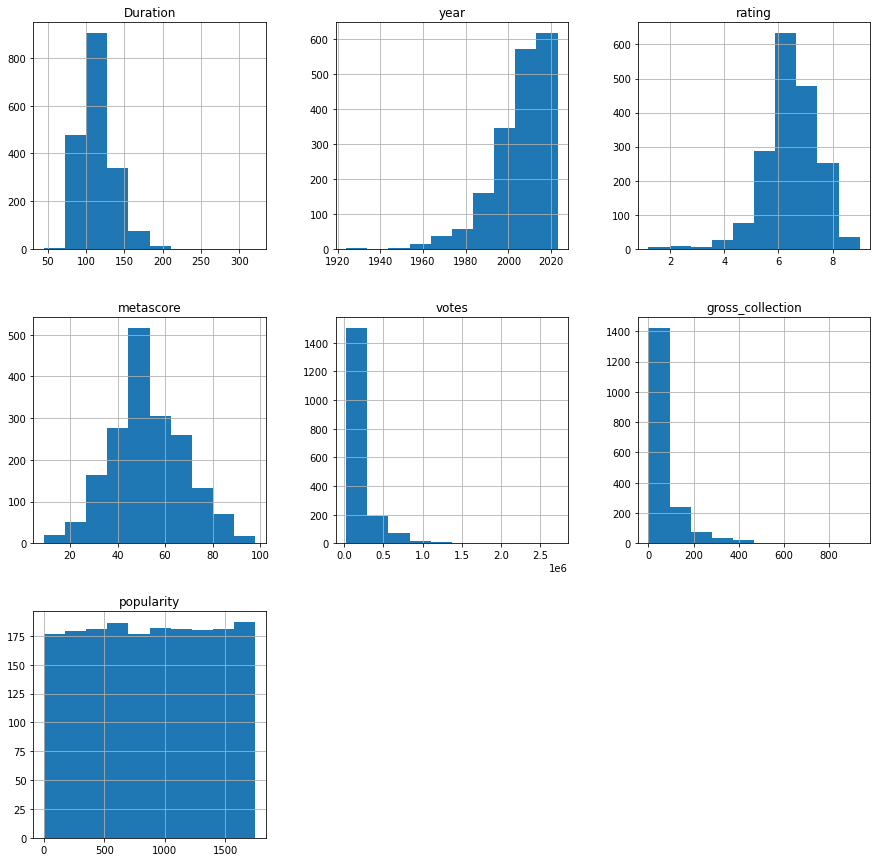

In [23]:
df[numerical].hist(figsize=(15,15))
plt.show()

In [24]:
df.dtypes

movie                object
Duration              int64
year                  int64
rating              float64
metascore           float64
Director1            object
Director2            object
votes                 int64
gross_collection    float64
popularity            int64
Certification        object
star1                object
star2                object
star3                object
star4                object
genre1               object
genre2               object
genre3               object
dtype: object

<AxesSubplot: xlabel='gross_collection', ylabel='Density'>

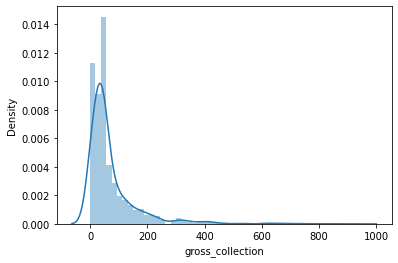

In [25]:
sns.distplot(df['gross_collection']) # histogram distribution

<AxesSubplot: xlabel='metascore', ylabel='Density'>

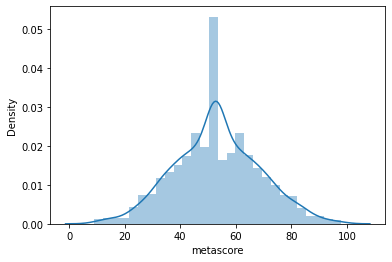

In [26]:
sns.distplot(df['metascore']) # histogram distribution

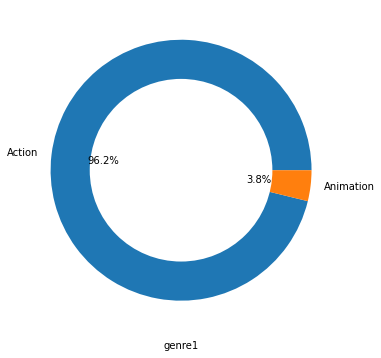

<Figure size 432x288 with 0 Axes>

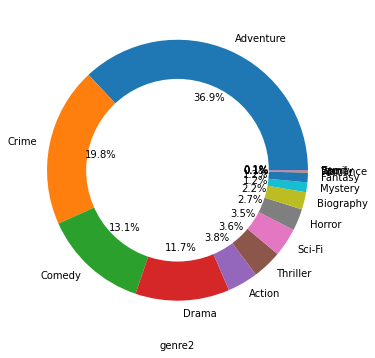

<Figure size 432x288 with 0 Axes>

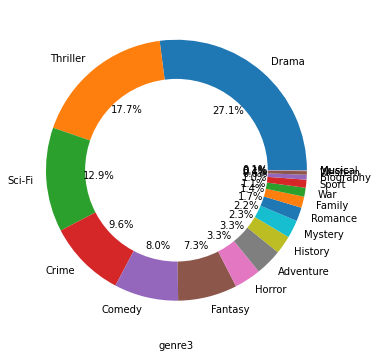

<Figure size 432x288 with 0 Axes>

In [27]:
genre= [ 'genre1', 'genre2', 'genre3']
for i in genre:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

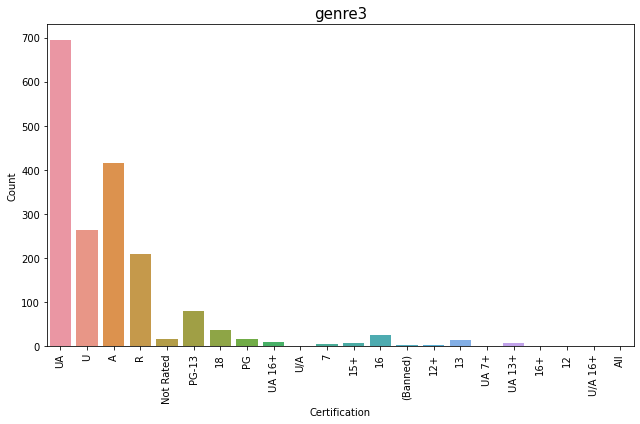

In [28]:
sns.set_palette('Set2_r')
plt.figure(figsize=(9,6), facecolor='white')
plotnumber =1
sns.countplot(x=df['Certification'])
plt.title(i,fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

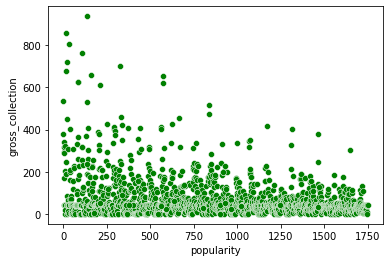

In [29]:

sns.scatterplot(x=df['popularity'],y=df['gross_collection'],color='green')
plt.show()

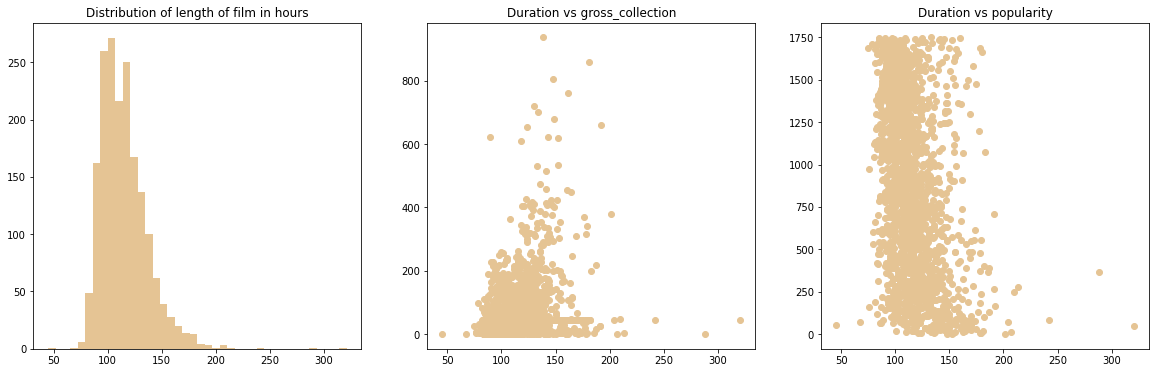

In [30]:

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(df['Duration'], bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(df['Duration'], df['gross_collection'])
plt.title('Duration vs gross_collection');
plt.subplot(1, 3, 3)
plt.scatter(df['Duration'], df['popularity'])
plt.title('Duration vs popularity');

Text(0, 0.5, 'year')

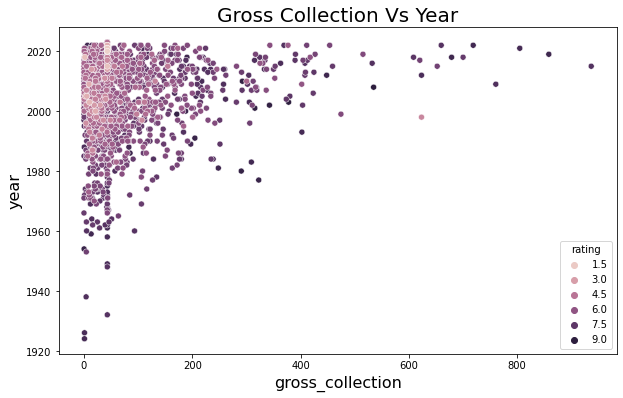

In [31]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Gross Collection Vs Year',fontsize =20)
sns.scatterplot(x=df['gross_collection'],y=df['year'],hue=df['rating'])
plt.xlabel('gross_collection',fontsize =16)
plt.ylabel('year',fontsize =16)

### Observation

More the Ratings, we had more gross collection


Text(0.5, 0, 'duration')

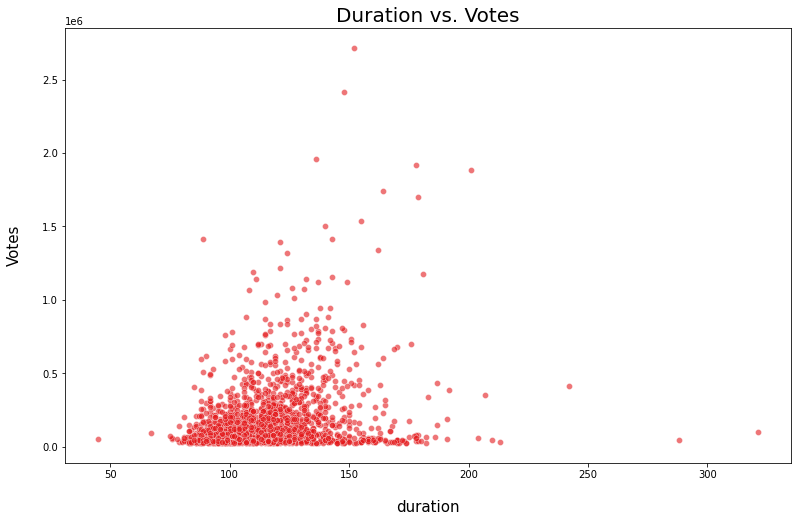

In [32]:
plt.figure(figsize=(13,8))

sns.scatterplot(x=df['Duration'], y=df['votes'], alpha=0.6)
plt.title("Duration vs. Votes", size=20)
plt.ylabel("Votes", size=15, labelpad=20)
plt.xlabel("duration", size=15, labelpad=20)

Text(0.5, 0, 'Votes')

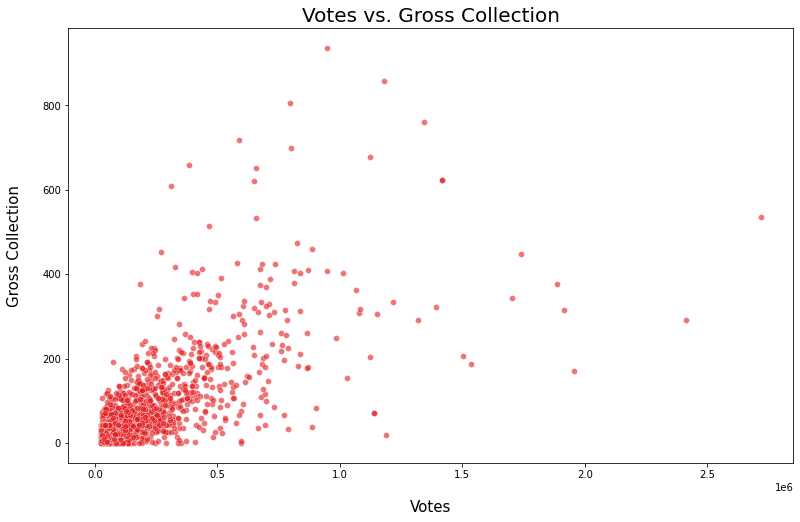

In [33]:
plt.figure(figsize=(13,8))

sns.scatterplot(x=df['votes'], y=df['gross_collection'], data=df, alpha=0.6)

plt.title("Votes vs. Gross Collection", size=20)
plt.ylabel("Gross Collection", size=15, labelpad=20)
plt.xlabel("Votes", size=15, labelpad=20)

Text(0.5, 0, 'rating')

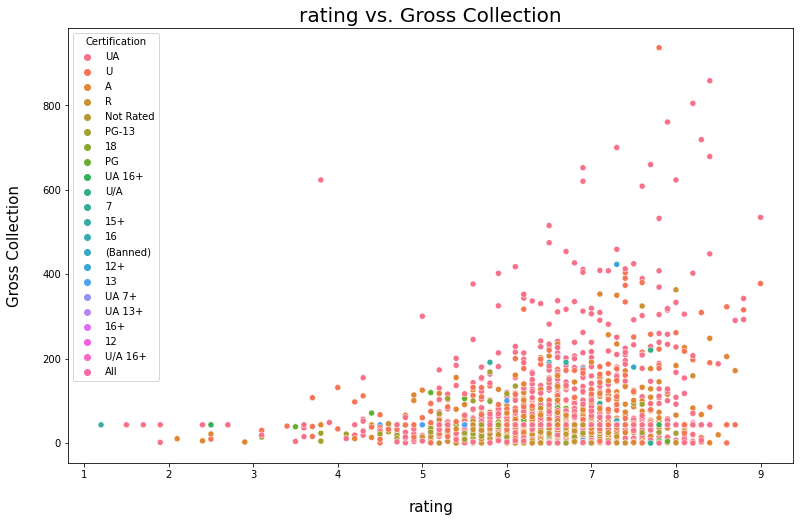

In [34]:
plt.figure(figsize=(13,8))

sns.scatterplot(x=df['rating'], y=df['gross_collection'],hue=df['Certification'])

plt.title("rating vs. Gross Collection", size=20)
plt.ylabel("Gross Collection", size=15, labelpad=20)
plt.xlabel("rating", size=15, labelpad=20)

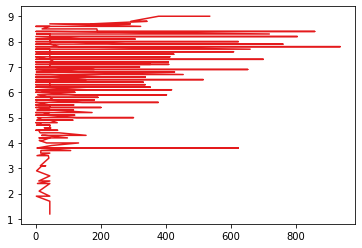

In [35]:
plt.plot(df['gross_collection'], df['rating'] )

The higher the revenue of the movie, the higher the ratings of the movie. 

Not all blockbusters are rated highly for the artistic merit of the movie.

However, how well a movie performs commercially in the theatre seems to be a good indicator of the rating of the movie

Text(0.5, 0, 'rating')

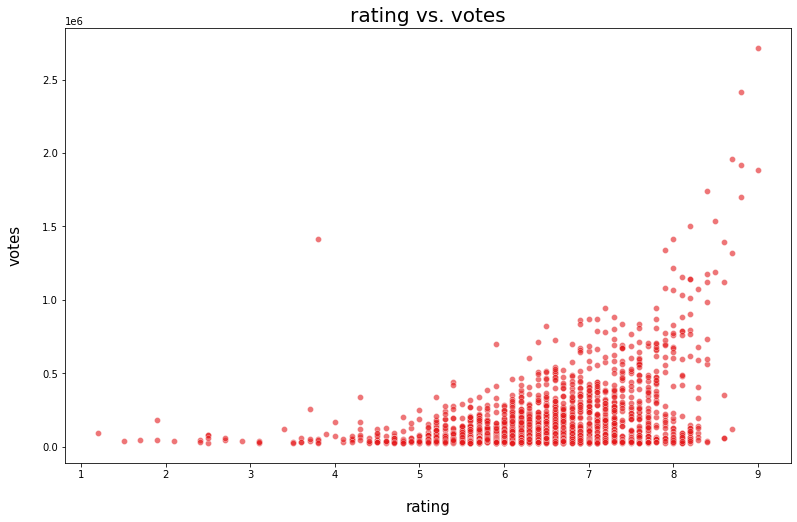

In [36]:
plt.figure(figsize=(13,8))

sns.scatterplot(x=df['rating'], y=df['votes'], alpha=0.6)
plt.title("rating vs. votes", size=20)
plt.ylabel("votes", size=15, labelpad=20)
plt.xlabel("rating", size=15, labelpad=20)

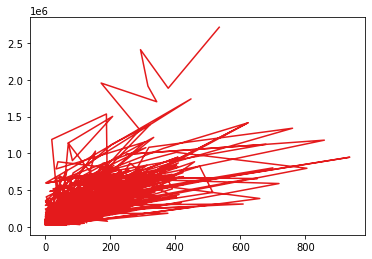

In [37]:
plt.plot(df['gross_collection'], df['votes'] )

Text(0.5, 0, 'Year')

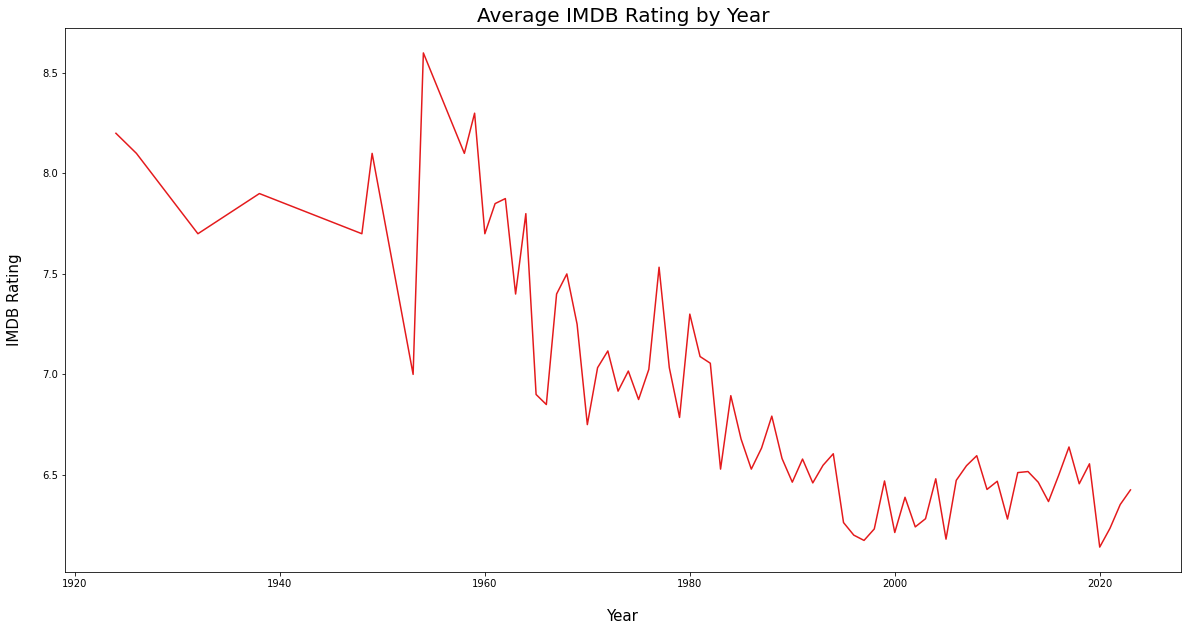

In [38]:
plt.figure(figsize=(20,10))
avg_score = df.groupby('year')['rating'].agg('mean')
avg_score.plot()


plt.title('Average IMDB Rating by Year', size=20)
plt.ylabel('IMDB Rating', size=15, labelpad=20)
plt.xlabel('Year', size=15, labelpad=20)

The movie ratings are generally higher in the early years (1920-1970). 

The average ratings are below 7 for movies produced after the 1980s. 

This shows that the voters on the IMDB are more inclined to give high ratings on older movies indicating bias in the IMDB reviewers

# Encoding of Categorical Data

In [39]:
df_categorical=df[categorical]
df_categorical.head()

movie          Director1  \
0                                    The Dark Knight  Christopher Nolan   
1      The Lord of the Rings: The Return of the King      Peter Jackson   
2                                          Inception  Christopher Nolan   
3  The Lord of the Rings: The Fellowship of the Ring      Peter Jackson   
4              The Lord of the Rings: The Two Towers      Peter Jackson   

   Director2 Certification              star1                 star2  \
0  Joe Russo            UA     Christian Bale          Heath Ledger   
1  Joe Russo             U        Elijah Wood       Viggo Mortensen   
2  Joe Russo            UA  Leonardo DiCaprio  Joseph Gordon-Levitt   
3  Joe Russo             U        Elijah Wood          Ian McKellen   
4  Joe Russo            UA        Elijah Wood          Ian McKellen   

             star3          star4  genre1     genre2  genre3  
0    Aaron Eckhart  Michael Caine  Action      Crime   Drama  
1     Ian McKellen  Orlando Bloom  Action  Adventure   Drama  
2      Elliot Page   Ken Watanabe  Action  Adventure  Sci-Fi  
3    Orlando Bloom      Sean Bean  Action  Adventure   Drama  
4  Viggo Mortensen  Orlando Bloom  Action  Adventure   Drama

In [40]:
df["genre1"].value_counts()

Action       1742
Animation      69
Name: genre1, dtype: int64

In [41]:
df["Certification"].value_counts()

UA           695
A            416
U            263
R            210
PG-13         79
18            36
16            25
Not Rated     17
PG            16
13            14
UA 16+        10
15+            8
UA 13+         7
7              4
12+            3
(Banned)       2
U/A            1
UA 7+          1
16+            1
12             1
U/A 16+        1
All            1
Name: Certification, dtype: int64

In [42]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['movie'] = encoder.fit_transform(df['movie'])
df['Director1'] = encoder.fit_transform(df['Director1'])
df['Director2'] = encoder.fit_transform(df['Director2'])
df['Certification'] = encoder.fit_transform(df['Certification'])
df['star1'] = encoder.fit_transform(df['star1'])
df['star2'] = encoder.fit_transform(df['star2'])
df['star3'] = encoder.fit_transform(df['star3'])
df['star4'] = encoder.fit_transform(df['star4'])
df['genre1'] = encoder.fit_transform(df['genre1'])
df['genre2'] = encoder.fit_transform(df['genre2'])
df['genre3'] = encoder.fit_transform(df['genre3'])
df

movie  Duration  year  rating  metascore  Director1  Director2    votes  \
0      1313       152  2008     9.0       84.0        146         41  2717546   
1      1416       201  2003     9.0       94.0        670         41  1886664   
2       607       148  2010     8.8       74.0        146         41  2412357   
3      1415       178  2001     8.8       92.0        670         41  1915366   
4      1417       179  2002     8.8       87.0        670         41  1702937   
...     ...       ...   ...     ...        ...        ...        ...      ...   
1806    986       109  2021     1.9       53.0        689         41   178758   
1807    984       160  2018     1.9       53.0        710         41    47520   
1808     85        85  2015     1.7       53.0        792         32    42912   
1809    397       125  2021     1.5       53.0        485         41    39414   
1810   1061       133  2020     1.2       53.0        533         41    96254   

      gross_collection  popularity  Certification  star1  star2  star3  star4  \
0               534.86           1             18    119    408      2    898   
1               377.85           2             15    184   1099    465   1016   
2               292.58           3             18    409    562    353    721   
3               315.54           4             15    184    426    941   1224   
4               342.55           5             18    184    426   1266   1016   
...                ...         ...            ...    ...    ...    ...    ...   
1806             43.16        1745             18    578    276   1007    515   
1807              1.69        1746             18     43    971    144    517   
1808             43.16        1747             18    192    464   1082   1411   
1809             43.16        1748             18    694     58    112    408   
1810             43.16        1749              4     24    889   1107     15   

      genre1  genre2  genre3  
0          0       4       4  
1          0       1       4  
2          0       1      13  
3          0       1       4  
4          0       1       4  
...      ...     ...     ...  
1806       0       4      15  
1807       0       4      15  
1808       0       7      13  
1809       0       4       4  
1810       0       5       4  

[1811 rows x 18 columns]

In [43]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['movie', 'Director1', 'Director2', 'Certification', 'star1', 'star2', 'star3', 'star4', 'genre1', 'genre2', 'genre3'], int64: ['Duration', 'year', 'votes', 'popularity'], float64: ['rating', 'metascore', 'gross_collection']}

In [44]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [movie, Duration, year, rating, metascore, Director1, Director2, votes, gross_collection, popularity, Certification, star1, star2, star3, star4, genre1, genre2, genre3]
Index: []

Observations:
    
No duplicate values present in the dataframe

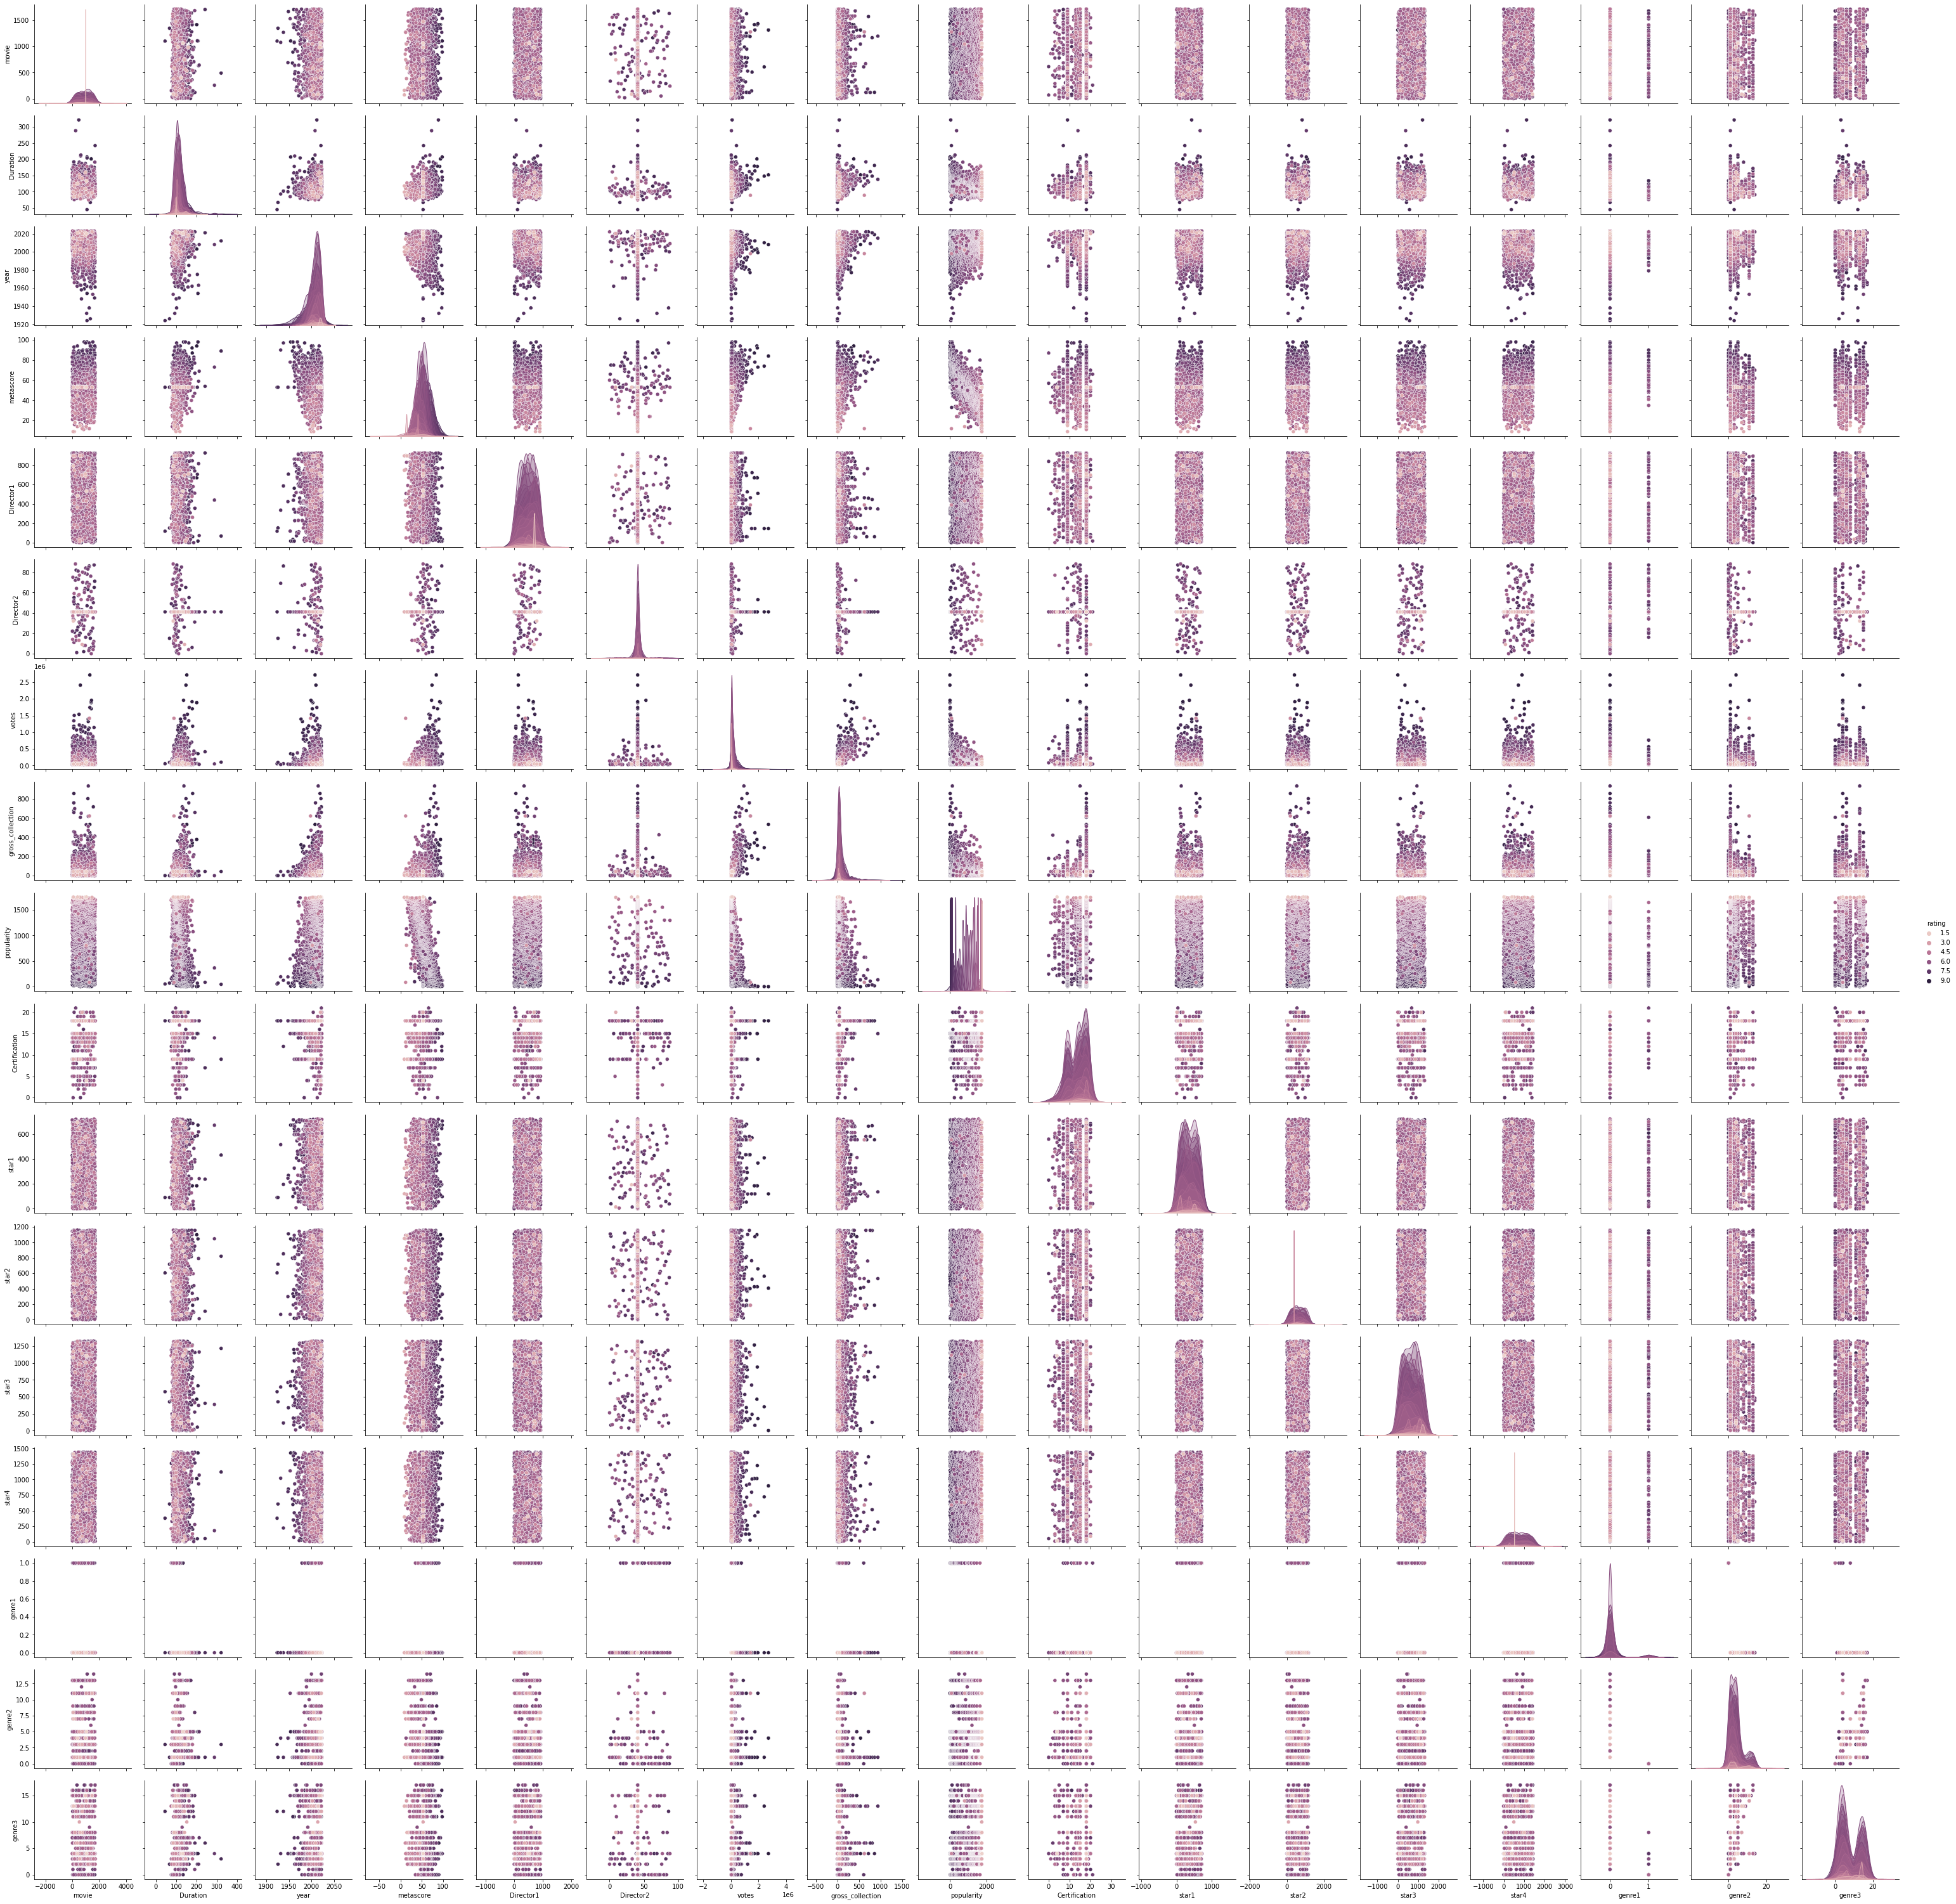

In [45]:
sns.pairplot(df, hue='rating')

<AxesSubplot: >

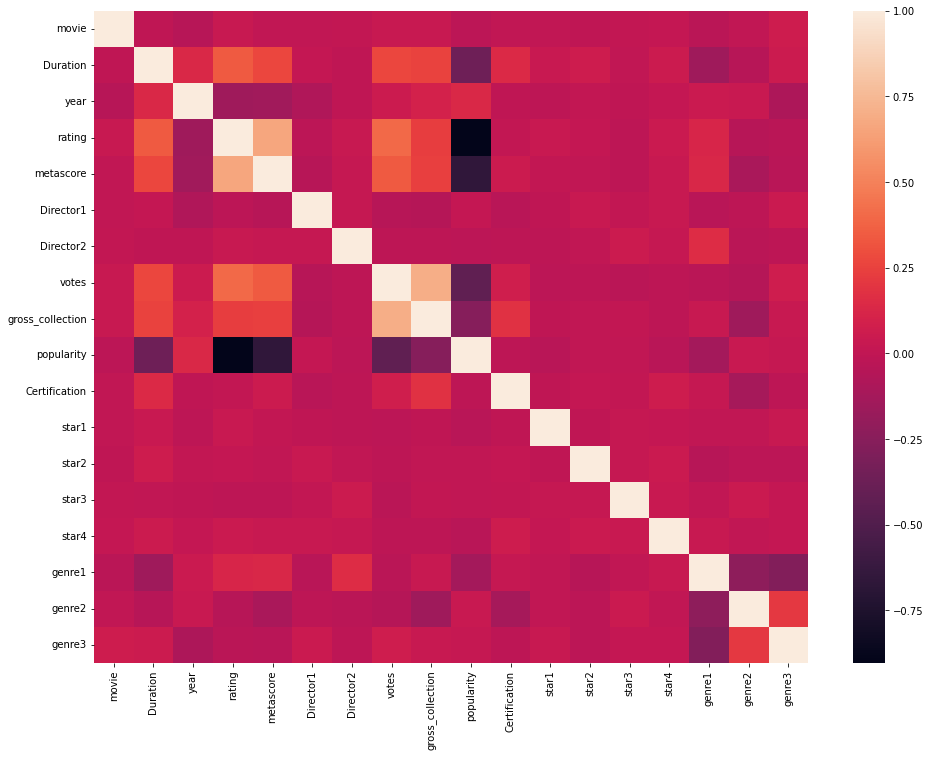

In [46]:
# Generating a heatmap to see which factors are correlated

plt.figure(figsize=(16,12))
correlation = df.corr()
sns.heatmap(correlation)

In [47]:
correlation_matrix = df.corr()
correlation_matrix['gross_collection'].sort_values(ascending=False)

gross_collection    1.000000
votes               0.698979
Duration            0.256291
metascore           0.239426
rating              0.230135
Certification       0.176725
year                0.099851
genre1              0.028723
movie               0.027970
genre3              0.027202
star3               0.010322
star2              -0.002858
star1              -0.006154
star4              -0.015503
Director2          -0.016341
Director1          -0.050994
genre2             -0.148487
popularity         -0.258754
Name: gross_collection, dtype: float64

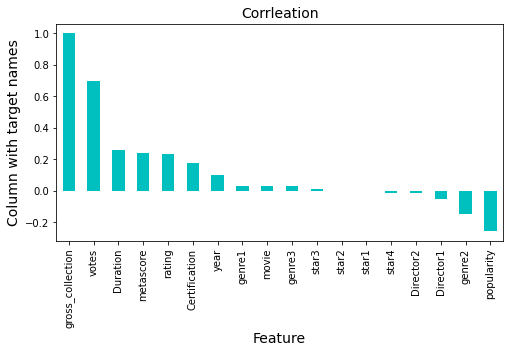

In [48]:
plt.figure(figsize=(8,4))
correlation_matrix["gross_collection"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=14)
plt.show()

Observations: (Correlation of Target variable with features)

    "Popularity" has almost NO correlation with target variable "Gross_collection"

    Max correlation: votes

    Min correlation: year

In [49]:
correlation_matrix2 = df.corr()
correlation_matrix2['votes'].sort_values(ascending=False)

votes               1.000000
gross_collection    0.698979
rating              0.404748
metascore           0.343348
Duration            0.265029
Certification       0.074331
genre3              0.070221
year                0.052455
movie               0.031139
star2              -0.014685
Director2          -0.014818
star4              -0.017635
star1              -0.022158
genre1             -0.028071
star3              -0.032375
Director1          -0.041302
genre2             -0.049490
popularity         -0.428986
Name: votes, dtype: float64

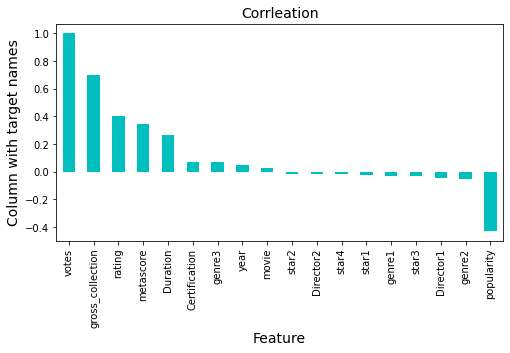

In [50]:
plt.figure(figsize=(8,4))
correlation_matrix2["votes"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=14)
plt.show()

Observations: (Correlation of Target variable with features)

    "Popularity" has almost NO correlation with target variable "Votees"

    Max correlation: gross_collection

    Min correlation: year

In [51]:
df.describe().style.background_gradient(cmap = "summer")

Observations:

1.count is same for all columns hence no null values present

2.Mean < Median for columns (left skewed) & Mean > Median for columns (right skewed): for most of the columns.
    however most of them are close to normal distribution as the difference is small

3.> difference between 75% && max for most of the columns..so outliers can exist

# Checking top features using SelectKBest algorithm

In [52]:
import pandas as pd
import numpy as np

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


X=df.drop("gross_collection",axis=1)  #independent columns
y=df["gross_collection"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['IMBD','Score']  #naming the dataframe columns
print(featureScores.nlargest(42,'Score'))  #print 10 best features

             IMBD        Score
7           votes  1728.151694
8      popularity   129.810469
1        Duration   127.177676
4       metascore   110.007171
3          rating   101.166086
9   Certification    58.319566
15         genre2    40.784788
2            year    18.217783
5       Director1     4.716276
14         genre1     1.493663
0           movie     1.416364
16         genre3     1.339586
6       Director2     0.483203
13          star4     0.434905
12          star3     0.192741
10          star1     0.068524
11          star2     0.014774


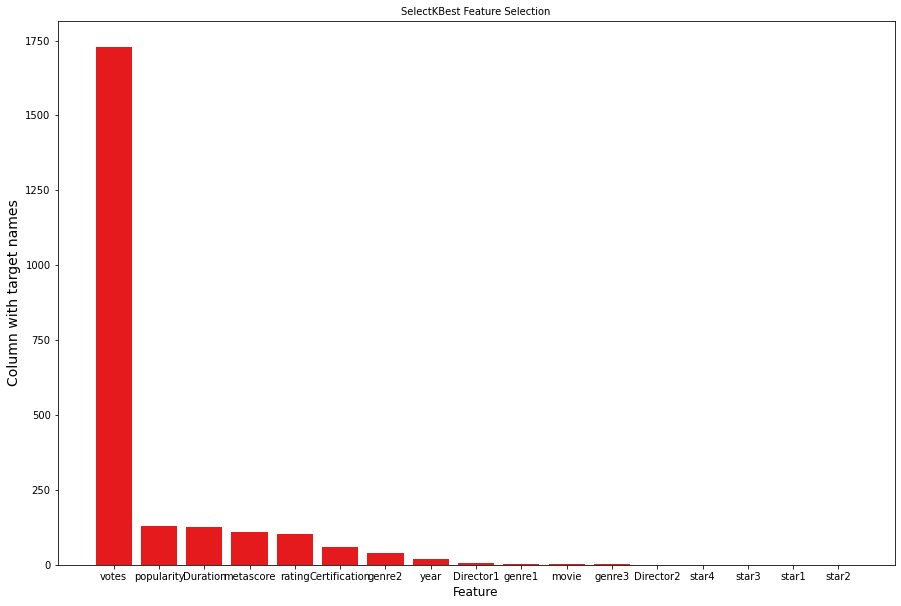

In [53]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(15,10))
plt.bar('IMBD','Score',data=df_sorted_desc)
plt.xlabel("Feature",fontsize=12)
plt.ylabel("Column with target names",fontsize=14)
plt.title("SelectKBest Feature Selection",fontsize=10)
plt.show()

In [54]:
df.drop(["movie","Director1","Director2","genre1","genre3","star1","star2","star3","star4"],axis=1,inplace=True) #,"popularity"
df.head(5)

Duration  year  rating  metascore    votes  gross_collection  popularity  \
0       152  2008     9.0       84.0  2717546            534.86           1   
1       201  2003     9.0       94.0  1886664            377.85           2   
2       148  2010     8.8       74.0  2412357            292.58           3   
3       178  2001     8.8       92.0  1915366            315.54           4   
4       179  2002     8.8       87.0  1702937            342.55           5   

   Certification  genre2  
0             18       4  
1             15       1  
2             18       1  
3             15       1  
4             18       1

# Pre-processing:

In [55]:
# Segregating only X data
x=df.drop("gross_collection",axis=1)
y=df["gross_collection"]

In [56]:
x.head(5)

Duration  year  rating  metascore    votes  popularity  Certification  \
0       152  2008     9.0       84.0  2717546           1             18   
1       201  2003     9.0       94.0  1886664           2             15   
2       148  2010     8.8       74.0  2412357           3             18   
3       178  2001     8.8       92.0  1915366           4             15   
4       179  2002     8.8       87.0  1702937           5             18   

   genre2  
0       4  
1       1  
2       1  
3       1  
4       1

In [57]:
y.head(5)

0    534.86
1    377.85
2    292.58
3    315.54
4    342.55
Name: gross_collection, dtype: float64

# Skewness Check

In [58]:
df.skew().sort_values(ascending=False)

votes               3.818879
gross_collection    3.615132
Duration            1.669423
genre2              1.536751
metascore           0.054104
popularity         -0.003302
Certification      -0.651956
rating             -0.790840
year               -1.461624
dtype: float64

Observations:

Skewness range: (+0.28,-0.28)

We don't remove skewness for X categorical columns and for target variable

In [59]:
df.agg(['skew', 'kurtosis']).transpose()

skew   kurtosis
Duration          1.669423   7.636619
year             -1.461624   3.245318
rating           -0.790840   2.399496
metascore         0.054104  -0.054976
votes             3.818879  22.665593
gross_collection  3.615132  18.446430
popularity       -0.003302  -1.199694
Certification    -0.651956  -0.637519
genre2            1.536751   2.050105

skewness can be interpreted

Fairly Symmetrical -0.5 to 0.5

Moderate Skewed -0.5 to -1.0 and 0.5 to 1.0

Highly Skewed < -1.0 and > 1.0

# Checking Outliers

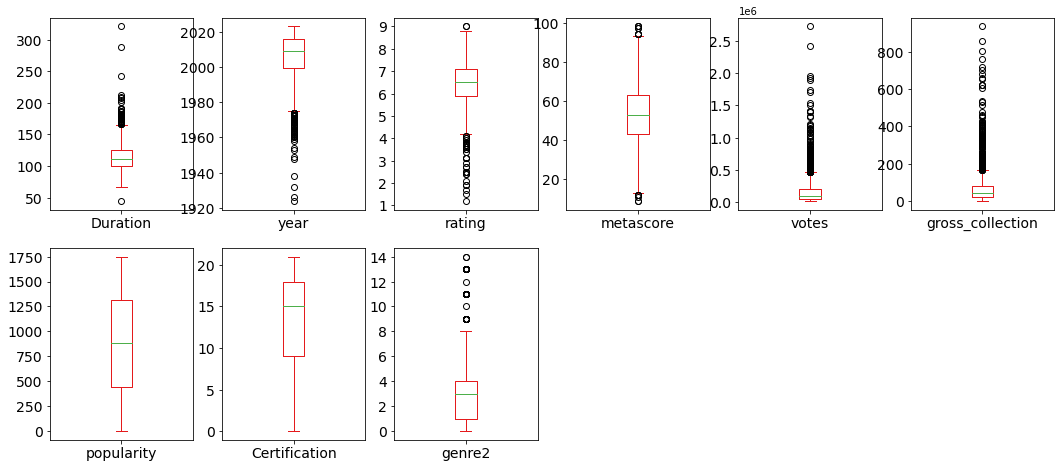

In [60]:
df.plot(kind="box",subplots=True,layout=(3,6),fontsize=14,figsize=(18,12))
plt.show()

Observations:

Outliers present in 'gross_collection','votes','genre1','gene2'

# Removing Outliers using z-score method

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    0,    1,    1,    1,    2,    3,    4,    5,    6,    8,
           9,   10,   10,   11,   13,   14,   16,   16,   17,   18,   18,
          20,   20,   24,   26,   28,   36,   37,   37,   40,   41,   42,
          42,   43,   46,   49,   52,   52,   56,   58,   68,   70,   71,
          72,   78,   80,   83,   83,   84,   84,   86,   99,  104,  105,
         108,  108,  109,  119,  125,  128,  130,  131,  135,  136,  136,
         143,  164,  164,  178,  179,  181,  182,  183,  193,  196,  202,
         203,  208,  218,  249,  249,  250,  256,  269,  271,  284,  286,
         294,  299,  301,  302,  313,  331,  334,  336,  346,  356,  370,
         372,  376,  381,  381,  395,  404,  409,  453,  465,  477,  498,
         509,  542,  553,  575,  579,  584,  586,  587,  622,  639,  665,
         667,  686,  687,  693,  695,  698,  707,  721,  722,  730,  778,
         788,  791,  792,  832,  846,  860,  861,  862,  872,  900,  905,
         943,  944,  952,  965,  990, 

In [62]:
# df_numerical.shape
df.shape

(1811, 9)

In [63]:
x_new=df[(z<3).all(axis=1)]
y_new=df[(z<3).all(axis=1)]

In [64]:
(np.abs(zscore(df))<3).all().all()

False

In [65]:
x_new.shape

(1625, 9)

In [66]:
# Data loss calculation with z-score method
loss_percent=(len(df)-len(x_new))/len(df)*100
loss_percent

10.270568746548868

Observations:

Data loss is more than 10% hence it is not  acceptable

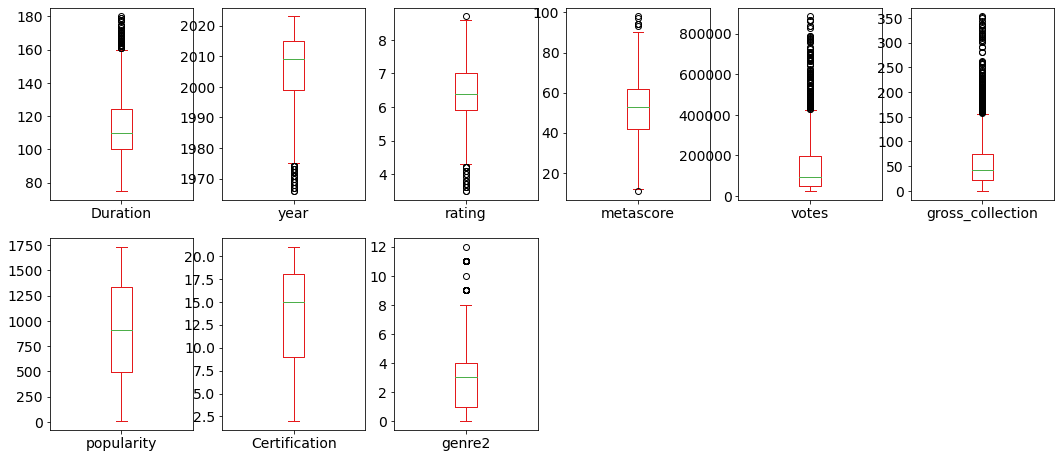

In [67]:
#Plotting features to check for outliers removal

x_new.plot(kind="box",subplots=True,layout=(3,6),fontsize=14,figsize=(18,12))
plt.show()

In [68]:
x_new

Duration  year  rating  metascore   votes  gross_collection  popularity  \
7          153  2020     8.7       53.0  119471             43.16           8   
12         163  2022     8.6       53.0   59818             43.16          13   
15         117  2018     8.4       87.0  564494            190.24          16   
19         101  2003     8.4       77.0  596212              0.71          20   
21         137  1986     8.4       84.0  732357             85.16          22   
...        ...   ...     ...        ...     ...               ...         ...   
1787       107  2000     3.6       14.0   35125             15.22        1727   
1788        95  1997     3.6       11.0   56354             35.93        1728   
1789        99  2017     3.6       53.0   33482             43.16        1729   
1790        98  1996     3.5       40.0   30256              3.79        1730   
1791        89  2011     3.5       37.0   26925             38.54        1731   

      Certification  genre2  
7                15       5  
12               15       5  
15               15       0  
19                9       5  
21               15       1  
...             ...     ...  
1787             18       1  
1788             18       1  
1789             18       5  
1790             18      11  
1791             12       1  

[1625 rows x 9 columns]

## Observations:

    Data loss is more than 10%

    Also due to small data set , we will consider the entire data set for model building

In [69]:
# check skewness
x_new.skew().sort_values(ascending=False)

votes               1.972424
gross_collection    1.964430
genre2              1.305166
Duration            0.831310
metascore           0.059999
popularity         -0.046567
rating             -0.281925
Certification      -0.602586
year               -0.956654
dtype: float64

Observations:
    
Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are all variables beyond this range

I will apply various methods to remove skewness and will consider the one with lowest skewness

In [70]:
# # Applied standard scaler only on continuous data as we don't scale categorical data
# # Here the standard scaler is applied eventhough skewness range is (-0.04,+0.04). This is done to get the normally distributed data
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.67151421,  0.15415513,  2.54508212, ..., -1.73927612,
         0.96861458,  0.16614638],
       [ 3.90675736, -0.22057634,  2.54508212, ..., -1.73729533,
         0.23363092, -0.79721891],
       [ 1.48904539,  0.30404772,  2.34371274, ..., -1.73531455,
         0.96861458, -0.79721891],
       ...,
       [-1.38483866,  0.67877919, -4.80490023, ...,  1.71916861,
         0.96861458,  1.12951167],
       [ 0.43984962,  1.12845696, -5.00626961, ...,  1.72114939,
         0.96861458,  0.16614638],
       [ 0.80478728,  1.05351066, -5.30832367, ...,  1.72313018,
        -2.46130916,  0.48726814]])

In [71]:
x.shape,y.shape

((1811, 8), (1811,))

# Model Building - Gross Collection Prediction
Starting with "LinearRegression" as the target variable is continuous data

In [72]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


Random State  Training R2 Score  Testing R2 Score  Difference in R2 Score
2           837          52.544371         52.506933                0.037438
1           229          52.558826         52.625338                0.066512
0           123          52.444747         52.368407                0.076340

In [73]:
# Getting the best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BRS=np.array(RSN)[0]
BRS

837

In [74]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [75]:
# Training the model and checking  metrics with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.6044222556138602
Mean Absolute Error(MAE) :  35.883777041225095
Mean Squared Error(MSE) :  3002.3373686707305
Root Mean Squared Error(RMSE) :  54.79358875517035


# Cross Validation for Linear Regression

In [76]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation table


No of Folds  Cross Validation R2 Score  Model R2 Score  \
8           10                  31.149932       60.442226   
7            9                  27.208105       60.442226   
6            8                  24.123409       60.442226   
5            7                  20.410775       60.442226   
3            5                  18.536238       60.442226   
4            6                  16.796564       60.442226   
2            4                   9.612408       60.442226   
1            3                  -1.792851       60.442226   
0            2                 -23.097426       60.442226   

   Difference in R2 Score  
8                0.292923  
7                0.332341  
6                0.363188  
5                0.400315  
3                0.419060  
4                0.436457  
2                0.508298  
1                0.622351  
0                0.835397

In [77]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
BCV

10

In [78]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: 31.149931926120473 
The model r2 score is: 60.44222556138602
Difference is: 0.2929229363526555


# Other Regression Algorithms

In [79]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# Defining the list with all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # Appending "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         # Appending "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          # Appending "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))# Appending "RMSE" to the list 
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("Table with performance of the models")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True)  # sorting the score table using the difference

Table with performance of the models


Model  Model R2 Score  Cross Validation R2 Score  \
4                         SVR()       15.848712                  14.818592   
1       DecisionTreeRegressor()       18.946763                  22.115873   
8       RandomForestRegressor()       62.704677                  58.464783   
12               XGBRegressor()       59.837720                  55.332319   
11          AdaBoostRegressor()       39.082947                  34.229427   
9         ExtraTreesRegressor()       65.877899                  59.600525   
10  GradientBoostingRegressor()       65.052621                  56.832329   
2         KNeighborsRegressor()       62.264138                  46.653715   
5                       Lasso()       60.909174                  45.167493   
7                  ElasticNet()       58.684689                  41.406705   
3                SGDRegressor()       60.213613                  38.346115   
6                       Ridge()       60.462481                  31.668490   
0            LinearRegression()       60.442226                  31.149932   

    Difference in R2 Score        MAE          MSE       RMSE  
4                 0.010301  40.890801  6386.874874  79.917926  
1                 0.031691  41.110028  6151.740493  78.433032  
8                 0.042399  30.523348  2830.622860  53.203598  
12                0.045054  31.834936  3048.217838  55.210668  
11                0.048535  47.943814  4623.453882  67.995984  
9                 0.062774  30.685649  2589.783189  50.889912  
10                0.082203  29.834936  2652.419708  51.501648  
2                 0.156104  33.724391  2864.058726  53.516901  
5                 0.157417  35.624552  2966.897103  54.469231  
7                 0.172780  36.952045  3135.730026  55.997589  
3                 0.218675  36.129984  3019.688528  54.951693  
6                 0.287940  35.879731  3000.800013  54.779558  
0                 0.292923  35.883777  3002.337369  54.793589

# Observations:

I have considered "ExtraTreesRegressor()" is the best model .
Best model( ExtraTreesRegressor()) for this dataset because of:

    1.highest R^2 score

    2.lowest root mean squared error

Out of all algorithms checked, ExtraTreesRegressor() model is selected for hyper parameter tuning

as the difference between model and cross-validation score is less

Hyper parameter tuning will be pefromed for "ExtraTreesRegressor()()"

# Hyper Parameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesRegressor()
# Create the random grid
parameters ={
            'n_estimators': [10,50],
            'criterion': ['mse', 'mae'],
            'max_depth': [2,8],
            'min_samples_split': [2,4],
            'min_samples_leaf': [1,2],
             'oob_score': [True, False],
            'max_features': ['sqrt','log2'],    
            'bootstrap': [True, False],
            'warm_start': [True, False],
                    }

In [81]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'oob_score': False,
 'warm_start': True}

In [82]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesRegressor(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    oob_score=GCV.best_params_['oob_score'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'], min_samples_leaf=GCV.best_params_['min_samples_leaf'],
                                    max_features=GCV.best_params_['max_features'],bootstrap=GCV.best_params_['bootstrap'],
                                     warm_start=GCV.best_params_['warm_start'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)

print("Model : ExtraTreesRegressor")
print("R2 Score : ",r2_score(y_test,pred))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred)))

Model : ExtraTreesRegressor
R2 Score :  0.664484139323152
Mean Absolute Error(MAE) :  32.9279862169331
Mean Squared Error(MSE) :  2546.4825071365117
Root Mean Squared Error(RMSE) :  50.46268430371607


In [83]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV R2 score is:",score*100,"\nThe model R2 score is:",r2_score(y_test,pred)*100)
print("Difference is:",r2_score(y_test,pred)-score)

The CV R2 score is: 52.927651410320834 
The model R2 score is: 66.44841393231519
Difference is: 0.13520762521994367


## Observations 
for ExtraTreesRegressor:
    
Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.135

Model with default parameters: The difference between Cross Validation Score and model score is  0.062

As the delta between model score and cross validation score is least in the model with default parameters, considering the model with default parameters as the best model for saving

# Save Model  - Gross Collection Prediction


In [84]:
import pickle
filename='grosscollection-IMDB-Prediction.pkl'
pickle.dump(models[8][1], open(filename,'wb'))  # saving  ExtraTreesRegressor  model with Default Parameters

# Conclusion - Gross Collection Prediction


In [85]:
loaded_model=pickle.load(open('grosscollection-IMDB-Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)
Predicted=loaded_model.predict(x_test)
Original=np.array(y_test)
Predicted_df=pd.DataFrame(data=Predicted,columns=["Predicted"])
Original_df=pd.DataFrame(data=Original,columns=["Original"])
conclusion=pd.concat([Predicted_df,Original_df],axis=1)
conclusion

65.87789889959694


Predicted  Original
0      32.3077     32.59
1      61.1962     47.38
2      58.5065     51.69
3      40.0888     43.16
4      41.9922     68.67
..         ...       ...
358    42.3808     67.64
359    82.7992     32.79
360    44.7019     54.23
361    31.3667     43.16
362    39.4034     32.00

[363 rows x 2 columns]

# Model- Votes Prediction

In [86]:
# Segregating only X data
x=df.drop("votes",axis=1)
y=df["votes"]

In [87]:
x.shape,y.shape


((1811, 8), (1811,))

In [88]:
# # Here the standard scaler is applied eventhough skewness range is (-0.04,+0.04). This is done to get the normally distributed data
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x


array([[ 1.67151421,  0.15415513,  2.54508212, ..., -1.73927612,
         0.96861458,  0.16614638],
       [ 3.90675736, -0.22057634,  2.54508212, ..., -1.73729533,
         0.23363092, -0.79721891],
       [ 1.48904539,  0.30404772,  2.34371274, ..., -1.73531455,
         0.96861458, -0.79721891],
       ...,
       [-1.38483866,  0.67877919, -4.80490023, ...,  1.71916861,
         0.96861458,  1.12951167],
       [ 0.43984962,  1.12845696, -5.00626961, ...,  1.72114939,
         0.96861458,  0.16614638],
       [ 0.80478728,  1.05351066, -5.30832367, ...,  1.72313018,
        -2.46130916,  0.48726814]])

In [89]:
x.shape,y.shape


((1811, 8), (1811,))

# Model Building-Votes Prediction
Starting with "LinearRegression" as the target variable is continuous data

In [90]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # Defining instance for linearregression

# Finding the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Finding the random state value where training r2-score = testing r2-score

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


Random State  Training R2 Score  Testing R2 Score  Difference in R2 Score
2           434          56.071353         56.060959                0.010394
0           309          56.129916         56.140629                0.010714
4           983          55.994111         56.010832                0.016720
3           625          56.090511         56.139404                0.048892
1           378          56.150803         56.205761                0.054957

In [91]:
# Getting the best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BRS=np.array(RSN)[0]
BRS


434

In [92]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [93]:
# Training the model and checking  metrics with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))


Model : Linear Regression
R2 Score :  0.5916922330121588
Mean Absolute Error(MAE) :  90452.30357470302
Mean Squared Error(MSE) :  29663719129.22851
Root Mean Squared Error(RMSE) :  172231.5857478776


# Cross Validation for Linear Regression


In [94]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation table


No of Folds  Cross Validation R2 Score  Model R2 Score  \
8           10                  -9.559036       59.169223   
7            9                 -17.625553       59.169223   
6            8                 -29.719404       59.169223   
5            7                 -39.775029       59.169223   
4            6                 -52.179000       59.169223   
3            5                 -67.978943       59.169223   
2            4                 -98.146242       59.169223   
1            3                -133.412755       59.169223   
0            2                -217.940758       59.169223   

   Difference in R2 Score  
8                0.687283  
7                0.767948  
6                0.888886  
5                0.989443  
4                1.113482  
3                1.271482  
2                1.573155  
1                1.925820  
0                2.771100

In [95]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
BCV

10

In [96]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: -9.559036162919723 
The model r2 score is: 59.16922330121588
Difference is: 0.687282594641356


# Other Regression Algorithms

In [97]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# Defining the list with all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # Appending "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         # Appending "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          # Appending "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))# Appending "RMSE" to the list 
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("Table with performance of the models")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True)  # sorting the score table using the difference

Table with performance of the models


Model  Model R2 Score  Cross Validation R2 Score  \
7                  ElasticNet()       50.111404                  41.395955   
4                         SVR()      -11.986133                 -22.742451   
2         KNeighborsRegressor()       70.979437                  51.861597   
10  GradientBoostingRegressor()       89.612328                  68.365249   
8       RandomForestRegressor()       86.975501                  65.559566   
9         ExtraTreesRegressor()       87.125240                  63.333650   
12               XGBRegressor()       89.347395                  64.235653   
3                SGDRegressor()       58.809431                  11.395481   
1       DecisionTreeRegressor()       80.245359                  32.199522   
6                       Ridge()       59.156774                  -8.123801   
5                       Lasso()       59.169104                  -9.540582   
0            LinearRegression()       59.169223                  -9.559036   
11          AdaBoostRegressor()       75.488638                  -2.912261   

    Difference in R2 Score            MAE           MSE           RMSE  
7                 0.087154  100685.296661  3.624426e+10  190379.254132  
4                 0.107563  138502.219455  8.135836e+10  285233.876454  
2                 0.191178   74632.996143  2.108355e+10  145201.766313  
10                0.212471   56746.113430  7.546684e+09   86871.652901  
8                 0.214159   60960.665620  9.462350e+09   97274.610183  
9                 0.237916   60747.893636  9.353564e+09   96713.823897  
12                0.251117   56579.863993  7.739159e+09   87972.490135  
3                 0.474140   90228.849617  2.992511e+10  172988.755258  
1                 0.480458   75220.617080  1.435182e+10  119799.098899  
6                 0.672806   90467.292292  2.967276e+10  172257.840995  
5                 0.687097   90452.147127  2.966381e+10  172231.836558  
0                 0.687283   90452.303575  2.966372e+10  172231.585748  
11                0.784009  112604.557906  1.780760e+10  133445.121231

### Observations:
I have considered "GradientBoostingRegressor()" is the best model
In this case, best model is chosen based on scoring parameter: r2_score However, best model can change if I change scoring parameter to MSE or MAE or RMSE

I have considered "GradientBoostingRegressor" is the best model .
Best model( GradientBoostingRegressor) for this dataset because of:

    1.highest R^2 score

    2.lowest root mean squared error

Out of all algorithms checked, GradientBoostingRegressor model is selected for hyper parameter tuning

as the difference between model and cross-validation score is less

Hyper parameter tuning will be peformed for "GradientBoostingRegressor()"

# Hyper Parameter Tuning


In [98]:
from sklearn.model_selection import GridSearchCV
# Defining parameters for Gradient Boosting Regressor
parameters ={
            'learning_rate': [0.1, 0.01],
            'loss':['absolute_error','huber', 'squared_error', 'quantile'],
            'n_estimators':[50,60],
            'criterion':['friedman_mse', 'squared_error'],
            'max_depth':[1,2],
            'min_samples_leaf': [1,2],
            "min_samples_split":[2,3]
            }

In [99]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 60}

In [100]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=GradientBoostingRegressor(learning_rate=GCV.best_params_['learning_rate'],n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    loss=GCV.best_params_['loss'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_leaf=GCV.best_params_['min_samples_leaf'],
                                  min_samples_split=GCV.best_params_['min_samples_split'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)

print("Model : GradientBoostingRegressor")
print("R2 Score : ",r2_score(y_test,pred))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred)))

Model : GradientBoostingRegressor
R2 Score :  0.8379769771856036
Mean Absolute Error(MAE) :  66023.91877062032
Mean Squared Error(MSE) :  11771036041.49161
Root Mean Squared Error(RMSE) :  108494.40557693107


In [101]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV R2 score is:",score*100,"\nThe model R2 score is:",r2_score(y_test,pred)*100)
print("Difference is:",r2_score(y_test,pred)-score)

The CV R2 score is: 60.20131165930416 
The model R2 score is: 83.79769771856036
Difference is: 0.23596386059256202


### Observations for GradientBoostingRegressor:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.235

Model with default parameters: The difference between Cross Validation Score and model score is 0.212

As the delta between model score and cross validation score is least in the model with default parameters, considering the model with default parameters as the best model for saving

# Save Model - Votes Prediction

In [102]:
import pickle
filename='votes-IMDB-Prediction.pkl'
pickle.dump(models[9][1], open(filename,'wb'))  # saving Gradient Boosting Regression model

# Conclusion - Votes Prediction

In [103]:
loaded_model=pickle.load(open('votes-IMDB-Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)
Predicted=loaded_model.predict(x_test)
Original=np.array(y_test)
Predicted_df=pd.DataFrame(data=Predicted,columns=["Predicted"])
Original_df=pd.DataFrame(data=Original,columns=["Original"])
conclusion=pd.concat([Predicted_df,Original_df],axis=1)
conclusion

89.6123284119548


Predicted  Original
0     70745.237728     53694
1    162063.869159    132297
2    234505.805033    199457
3     57055.161207     99571
4    155202.934319    100435
..             ...       ...
358   96264.689756     46817
359  161677.375173    173644
360  269295.054931    142607
361   69511.579456     48873
362   93645.961995    103111

[363 rows x 2 columns]